### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the Data

In [2]:
#Reading data from the csv
bike_share = pd.read_csv('day.csv')

In [3]:
#First 10 rows
bike_share.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
#number of rows and columns
bike_share.shape

(730, 16)

In [5]:
#Inspecting for null values and the datatypes
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#summary of the numerical columns
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#check the columns of data
bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Inference:

There are 730 rows and 16 columns in the data, of which, 11 columns are integer, 4 float and 1 object.

### DATA QUALITY CHECK

#### Check for NULL/MISSING values

In [8]:
bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Inference:

There are no missing values

#### Duplicate Check

In [9]:
bike_share.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

Inference:

There are no duplicate columns

#### Dropping unnecessary columns

- instant - index column which has nothing to do with target
- dteday - we have already have month and weekday columns to work with
- casual and registered - we have cnt column which is sum of the both that is the target column

In [10]:
bike_share.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [11]:
#Inspection after dropping
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
#Checking for unique value and their counts
bike_share.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
#Checking for unique value and their counts
bike_share.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [15]:
#Checking for the correlation
bike_share.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


<AxesSubplot:>

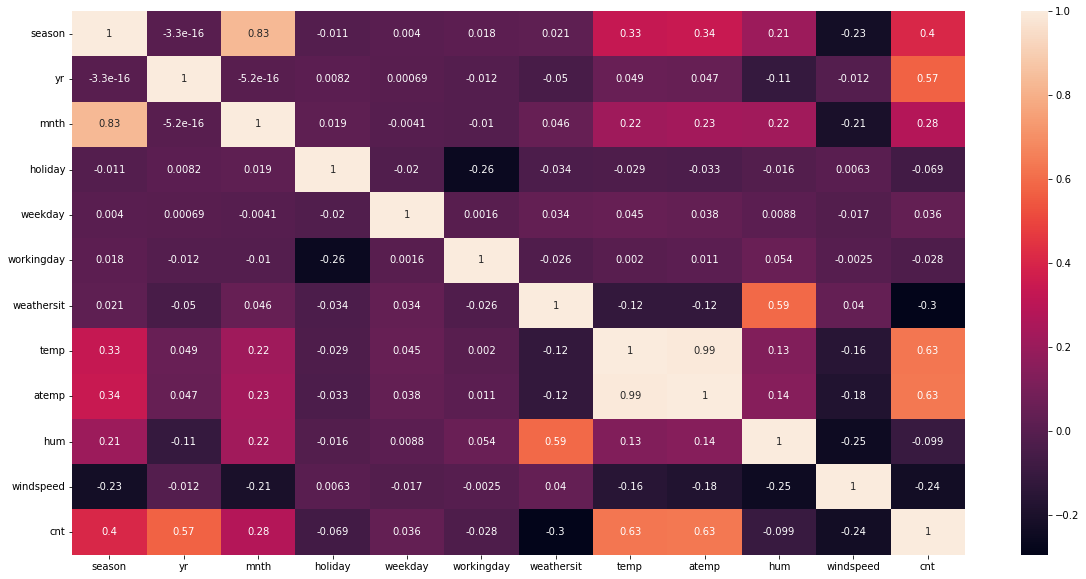

In [16]:
#Checking for the correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(bike_share.corr(), annot = True)

#### Creating Categorical data

In [17]:
# Check the datatypes to select columns for conversion
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [18]:
# Convert to object data type
bike_share['season']=bike_share['season'].astype(object)
bike_share['weathersit']=bike_share['weathersit'].astype(object)
bike_share['mnth']=bike_share['mnth'].astype(object)
bike_share['weekday']=bike_share['weekday'].astype(object)

In [19]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [20]:
bike_share.season = bike_share.season.map({1: 'Spring',2:'Summer',3:'Autumn',4:'Winter'})
bike_share.weathersit = bike_share.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
bike_share.weekday = bike_share.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [21]:
import calendar
bike_share['mnth'] = bike_share['mnth'].apply(lambda x: calendar.month_abbr[x])

In [22]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Handling Outliers

<AxesSubplot:ylabel='windspeed'>

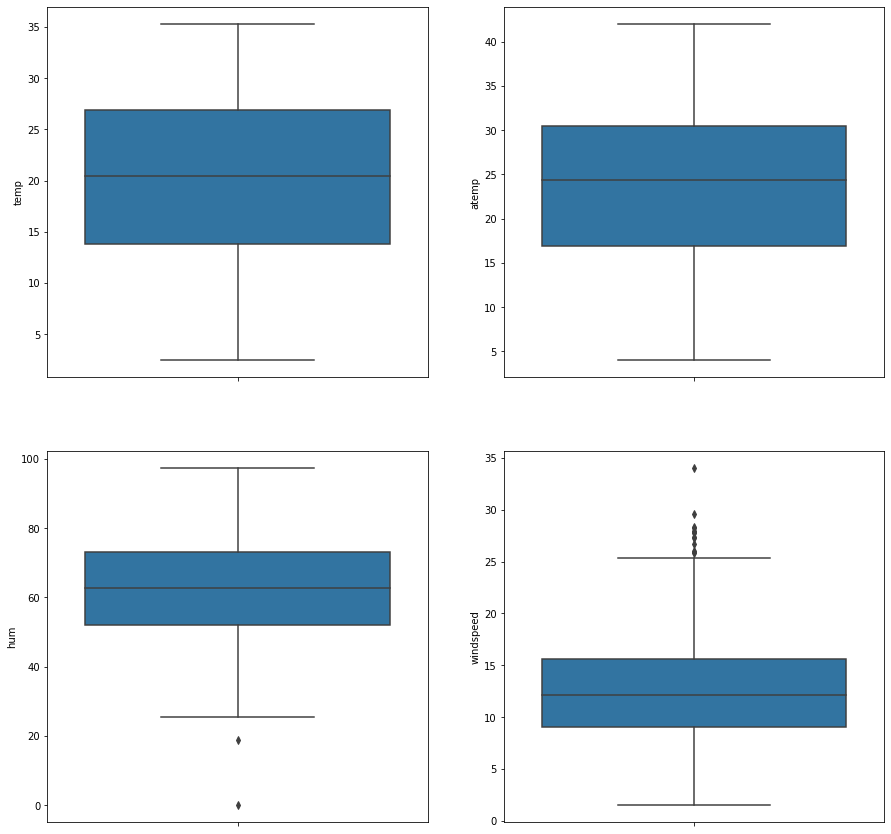

In [23]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.boxplot(y = 'temp', data = bike_share)

plt.subplot(2,2,2)
sns.boxplot(y = 'atemp', data=bike_share)

plt.subplot(2,2,3)
sns.boxplot(y = 'hum', data=bike_share)

plt.subplot(2,2,4)
sns.boxplot(y = 'windspeed', data=bike_share)

Humidity and windspeed have a few outliers

### EDA

<Figure size 360x360 with 0 Axes>

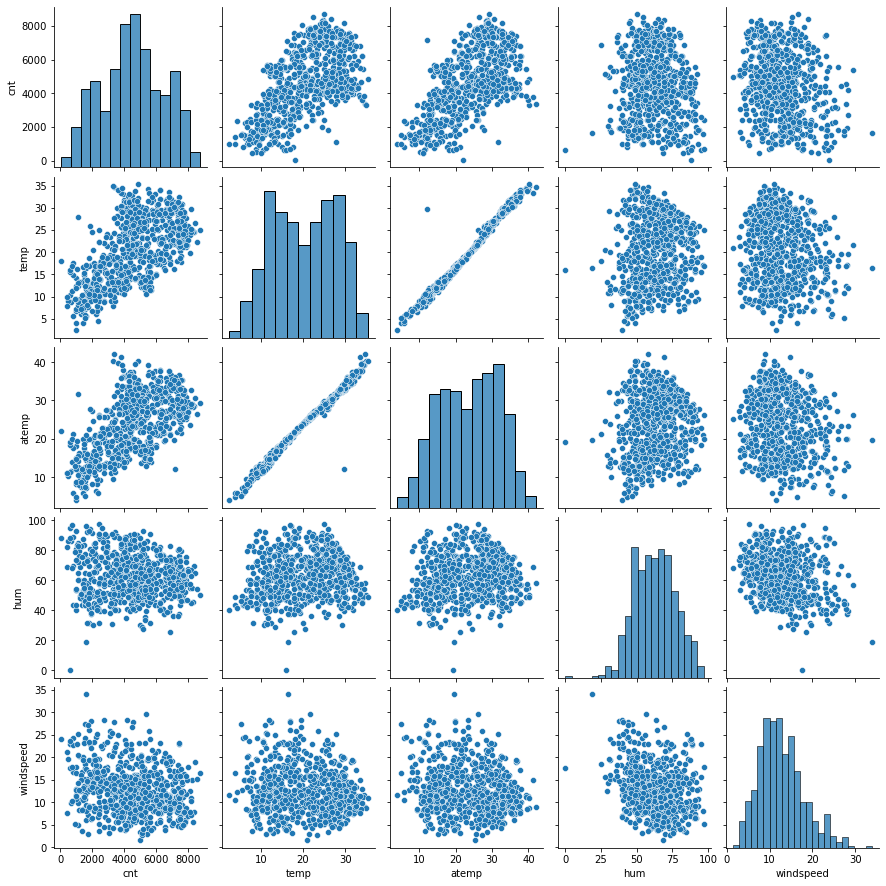

In [24]:
#Pairplots for numeric variables
plt.figure(figsize = (5,5))
sns.pairplot(data=bike_share,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

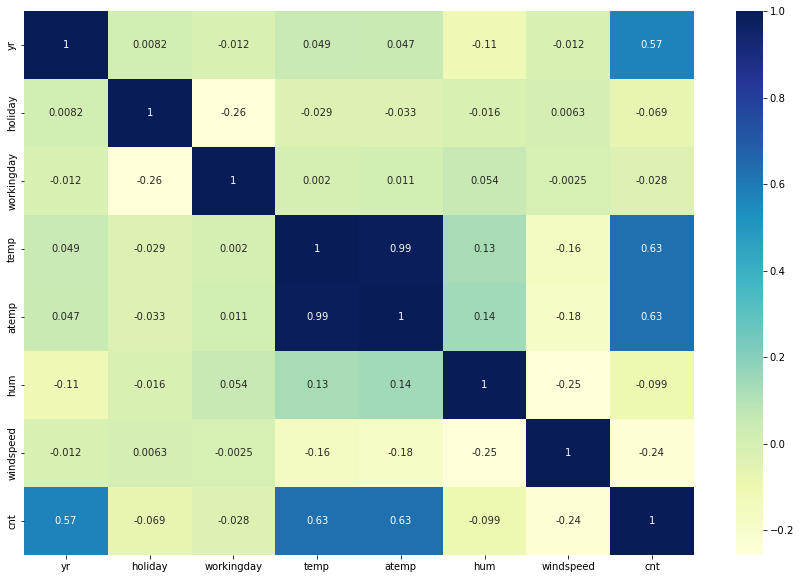

In [25]:
#Correlation between all variables
#corr = bike_share.corr()
plt.figure(figsize=(15,10))

#Draw Heatmap of correlation
sns.heatmap(bike_share.corr(), annot=True, cmap='YlGnBu' )
plt.show()

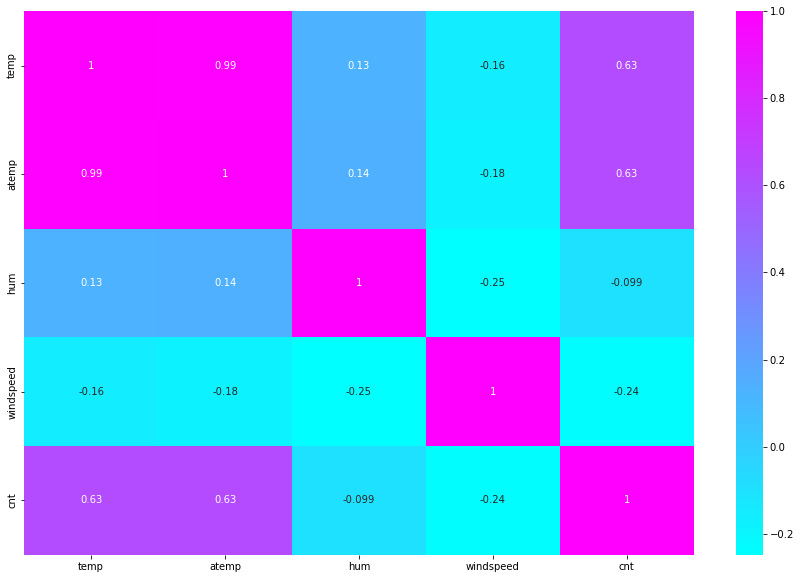

In [26]:
# Checking continuous variables relationship with each other
plt.figure(figsize=(15,10))
sns.heatmap(bike_share[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='cool', annot = True)
plt.show()

- temp and atemp show positive correlation with cnt
- temp and atemp have high correlation (0.99)


#### Categorical vs target variables 

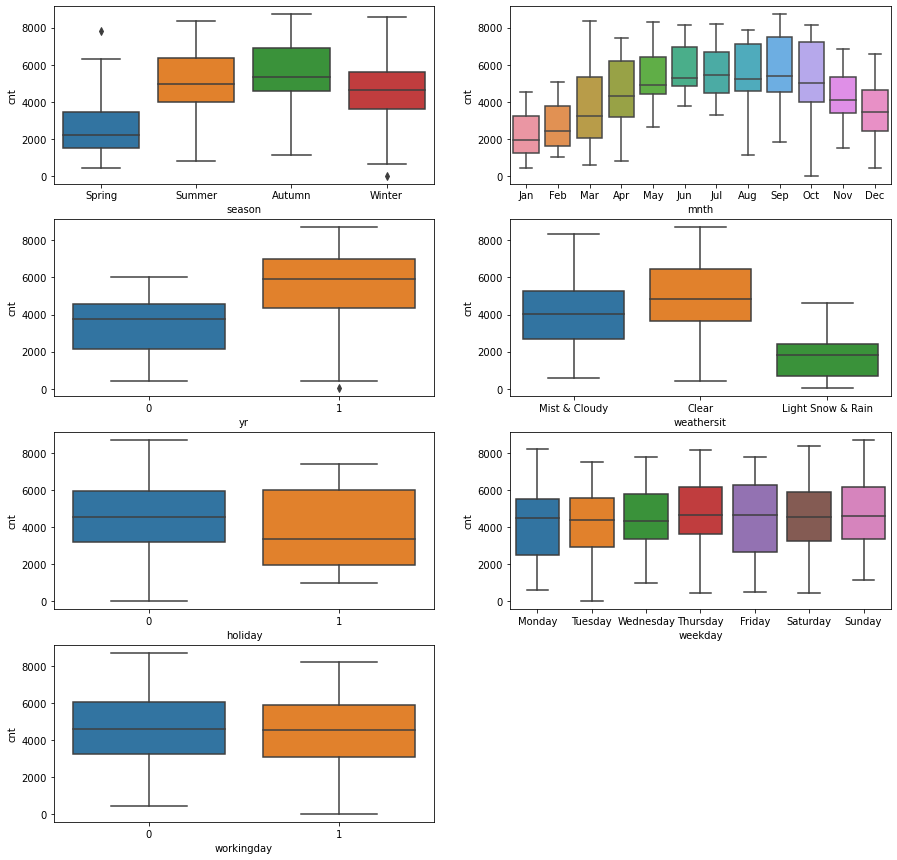

In [27]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share)

plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share)

plt.subplot(4,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_share)

plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share)

plt.subplot(4,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share)

plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share)

plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share)

plt.show()

#### Insights:
1. season: Autumn is the season that shows the highest demand. 
2. mnth: Month-wise, it's September that has exceptionally high demand. March shows good demand as well. 
3. yr: Demand has increased for 2019 as compared with 2018. 
4. weathersit: Clear weather conditions invite more customers. 
5. holiday: On holidays there is decreased demand. 
6. weekday: The demand seems to be more or less constant throughout the week. 
7. workingday: Working days in comparison, tend to have slightly less customers.

#### Numerical vs target variables 

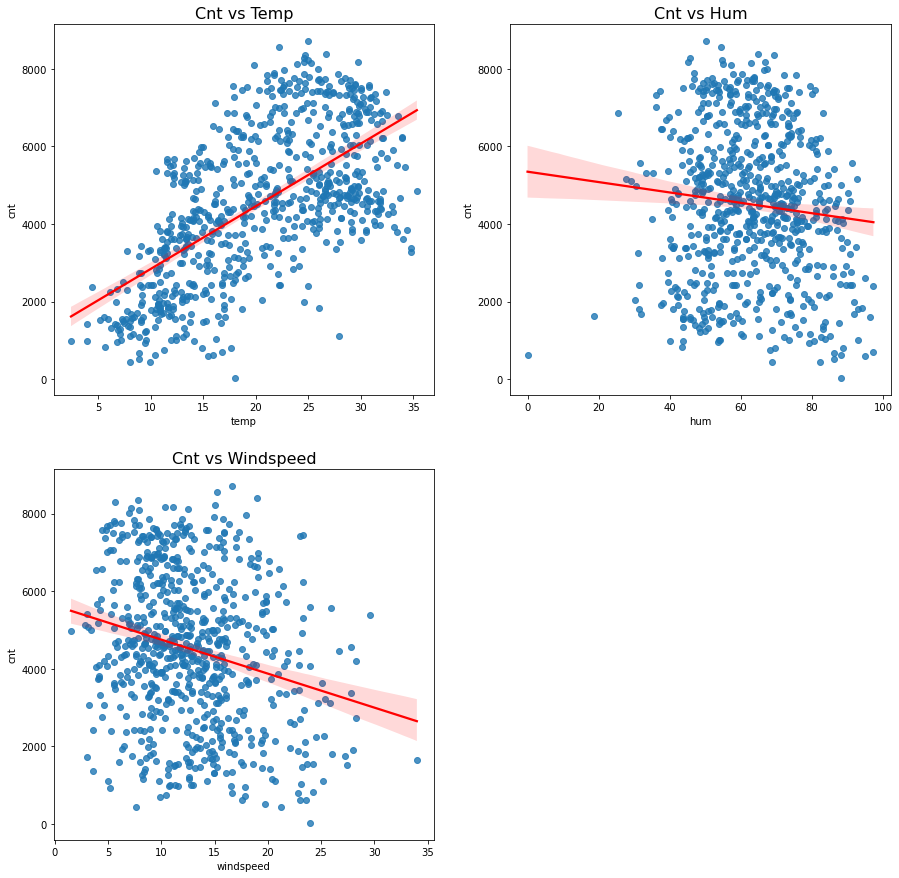

In [28]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_share,y="cnt",x="temp", line_kws={"color": "red"})
#plt.xlabel("Temperature")

plt.subplot(2,2,2)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike_share,y="cnt",x="hum", line_kws={"color": "red"})
#plt.xlabel("Humidity")

plt.subplot(2,2,3)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike_share,y="cnt",x="windspeed", line_kws={"color": "red"})


plt.show()

#### Insights :

Demand for bikes is positively correlated to temp and negatively correlated to windspeed.
Humidity shows a very gentle decreasing trend.

### Data Preparation for Linear Regression 

In [29]:
#Creating dummy variables
bike_share = pd.get_dummies(bike_share)

In [30]:
#Checking the columns
bike_share.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Autumn', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Apr', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct', 'mnth_Sep', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Clear',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [31]:
#Inspecting the first few rows
bike_share.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Autumn,season_Spring,...,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,1,0,0,0,0,0,0,1,0,0


### Model Building

#### Split Data into training and test

In [32]:
# Checking shape
bike_share.shape

(730, 34)

In [33]:
#Train Test split with 70:30 ratio
train, test = train_test_split(bike_share, train_size = 0.70, test_size = 0.30, random_state = 100)

In [34]:
# Checking shape and size for train and test
print(train.shape)
print(test.shape)

(510, 34)
(219, 34)


#### Scaling continuous variables

In [35]:
#Normalizing the data
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [36]:
#Statistics of the train data
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Autumn,season_Spring,...,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.262745,0.243137,...,0.147059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.440557,0.429398,...,0.354512,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#Inspecting first few rows of the train data
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Autumn,season_Spring,...,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
# Dividing into X and Y sets for the model building
y_train = train.pop('cnt')
X_train = train

#### Using RFE for model building and column elimination

In [39]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# running RFE
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [40]:
#List of columns selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 17),
 ('workingday', False, 18),
 ('temp', True, 1),
 ('atemp', False, 19),
 ('hum', False, 16),
 ('windspeed', False, 15),
 ('season_Autumn', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 12),
 ('season_Winter', True, 1),
 ('mnth_Apr', False, 14),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 11),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Friday', False, 6),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 3),
 ('weekday_Thursday', False, 4),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 7),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

Starting with all the columns selected by RFE

In [41]:
#Columns selected by RFE
cols = X_train.columns[rfe.support_]

In [42]:
cols

Index(['yr', 'temp', 'season_Autumn', 'season_Spring', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep',
       'weekday_Tuesday', 'weathersit_Clear', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [43]:
#Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_Summer',
       'mnth_Apr', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Wednesday'],
      dtype='object')

Model 1: Start with all variables selected by RFE

In [44]:
X_train_sm1 = sm.add_constant(X_train[cols])
lr1 = sm.OLS(y_train, X_train_sm1).fit()
lr1.params
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.74e-177
Time:                        01:25:00   Log-Likelihood:                 484.04
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     495   BIC:                            -874.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [45]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features    VIF
12              weathersit_Clear  21.41
14      weathersit_Mist & Cloudy  11.53
1                           temp   4.24
3                  season_Spring   3.47
2                  season_Autumn   3.39
4                  season_Winter   2.49
8                       mnth_Jan   2.29
7                       mnth_Feb   1.85
13  weathersit_Light Snow & Rain   1.84
9                       mnth_Nov   1.77
5                       mnth_Aug   1.68
6                       mnth_Dec   1.62
10                      mnth_Sep   1.41
0                             yr   1.02
11               weekday_Tuesday   1.01


Model - 2

In [46]:
#dropping weathersit_Clear - VIF - 21.41
cols = ['yr', 'temp', 'season_Autumn', 'season_Spring', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep',
       'weekday_Tuesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy']


X_train_sm2 = sm.add_constant(X_train[cols])
lr2 = sm.OLS(y_train, X_train_sm2).fit()
lr2.params
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.5
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.74e-177
Time:                        01:25:00   Log-Likelihood:                 484.04
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     495   BIC:                            -874.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [47]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features   VIF
1                           temp  5.04
2                  season_Autumn  4.23
3                  season_Spring  3.64
4                  season_Winter  3.07
8                       mnth_Jan  2.23
0                             yr  2.07
7                       mnth_Feb  1.88
5                       mnth_Aug  1.86
9                       mnth_Nov  1.80
6                       mnth_Dec  1.58
13      weathersit_Mist & Cloudy  1.53
10                      mnth_Sep  1.51
11               weekday_Tuesday  1.19
12  weathersit_Light Snow & Rain  1.07


Model - 3

In [48]:
#mnth_Feb  - p - 0.101


cols = ['yr', 'temp', 'season_Autumn', 'season_Spring', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep',
       'weekday_Tuesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy']


X_train_sm3 = sm.add_constant(X_train[cols])
lr3 = sm.OLS(y_train, X_train_sm3).fit()
lr3.params
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.6
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.85e-178
Time:                        01:25:00   Log-Likelihood:                 482.66
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     496   BIC:                            -878.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [49]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features   VIF
1                           temp  4.97
2                  season_Autumn  4.20
4                  season_Winter  3.01
3                  season_Spring  2.08
0                             yr  2.06
5                       mnth_Aug  1.86
8                       mnth_Nov  1.78
7                       mnth_Jan  1.66
12      weathersit_Mist & Cloudy  1.53
9                       mnth_Sep  1.51
6                       mnth_Dec  1.48
10               weekday_Tuesday  1.19
11  weathersit_Light Snow & Rain  1.07


Model - 4

In [50]:
#mnth_Jan - p - 0.054


cols = ['yr', 'temp', 'season_Autumn', 'season_Spring', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Nov', 'mnth_Sep',
       'weekday_Tuesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy']


X_train_sm4 = sm.add_constant(X_train[cols])
lr4 = sm.OLS(y_train, X_train_sm4).fit()
lr4.params
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.2
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          2.17e-178
Time:                        01:25:00   Log-Likelihood:                 480.75
No. Observations:                 510   AIC:                            -935.5
Df Residuals:                     497   BIC:                            -880.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [51]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features   VIF
1                           temp  4.86
2                  season_Autumn  4.16
4                  season_Winter  2.96
0                             yr  2.05
5                       mnth_Aug  1.86
7                       mnth_Nov  1.77
8                       mnth_Sep  1.51
11      weathersit_Mist & Cloudy  1.51
6                       mnth_Dec  1.43
3                  season_Spring  1.39
9                weekday_Tuesday  1.19
10  weathersit_Light Snow & Rain  1.07


Model - 5

In [52]:
#mnth_Dec - p - 0.128

cols = ['yr', 'temp', 'season_Autumn', 'season_Spring', 'season_Winter',
       'mnth_Aug', 'mnth_Nov', 'mnth_Sep',
       'weekday_Tuesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy']


X_train_sm5 = sm.add_constant(X_train[cols])
lr5 = sm.OLS(y_train, X_train_sm5).fit()
lr5.params
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.64e-179
Time:                        01:25:00   Log-Likelihood:                 479.56
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     498   BIC:                            -884.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [53]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                        Features   VIF
1                           temp  4.82
2                  season_Autumn  4.10
4                  season_Winter  2.24
0                             yr  2.05
5                       mnth_Aug  1.86
6                       mnth_Nov  1.56
10      weathersit_Mist & Cloudy  1.51
7                       mnth_Sep  1.49
3                  season_Spring  1.33
8                weekday_Tuesday  1.19
9   weathersit_Light Snow & Rain  1.07


Model - 6

In [54]:
#mnth_Nov - p - 0.067


cols = ['yr', 'temp', 'season_Autumn', 'season_Spring', 'season_Winter',
       'mnth_Aug', 'mnth_Sep', 'weekday_Tuesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy']


X_train_sm6 = sm.add_constant(X_train[cols])
lr6 = sm.OLS(y_train, X_train_sm6).fit()
lr6.params
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.6
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.59e-179
Time:                        01:25:00   Log-Likelihood:                 477.84
No. Observations:                 510   AIC:                            -933.7
Df Residuals:                     499   BIC:                            -887.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [55]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                       Features   VIF
1                          temp  4.80
2                 season_Autumn  4.07
0                            yr  2.05
5                      mnth_Aug  1.85
4                 season_Winter  1.60
9      weathersit_Mist & Cloudy  1.51
6                      mnth_Sep  1.47
3                 season_Spring  1.33
7               weekday_Tuesday  1.19
8  weathersit_Light Snow & Rain  1.06


#### Inference

In Model - 6, VIF of all features are below 5, and corresponding p - values are almost '~0.0000'.

Here VIF seems to be almost accepted. 

R-squared is 0.821 and Adj. R-squared is 0.818.
All the junk/insignificant values have been dealt with, and also variables with high multicolinearity have been removed.

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 229.6
Prob (F-statistic): 1.59e-179
The F-Statistics value of 230 (which is greater than 1) 

All the facts above are indicative of the fact that the overall model is significant

#### Taking Model 6 into consideration, the equation for the best-fit line is:

cnt = 0.0.1942 + (yr x 0.2332) + (temp x 0.4944) + (season_Autumn x -0.0723) + (season_Spring x -0.1179) + (season_Winter x 0.0433) + (mnth_Aug x 0.0434) + (mnth_Sep x 0.1076) + (weekday_Tuesday x -0.0304) + (weathersit_Light Snow & Rain x -0.2981) + (weathersit_Mist & Cloudy x -0.0792)

## Assumptions

#### Error terms are normally distributed with mean zero

In [56]:
#Residual Analysis Of Training Data
y_train_pred = lr6.predict(X_train_sm6)

Text(0.5, 0, 'Errors')

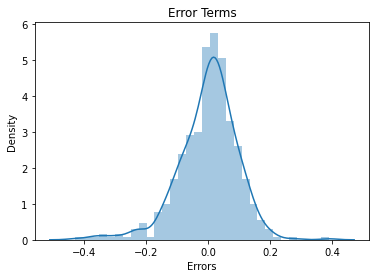

In [57]:
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error Terms')
plt.xlabel('Errors')

The histogram seconds our assumption that the residuals are indeed normally distributed

#### X and y have a linear relationship

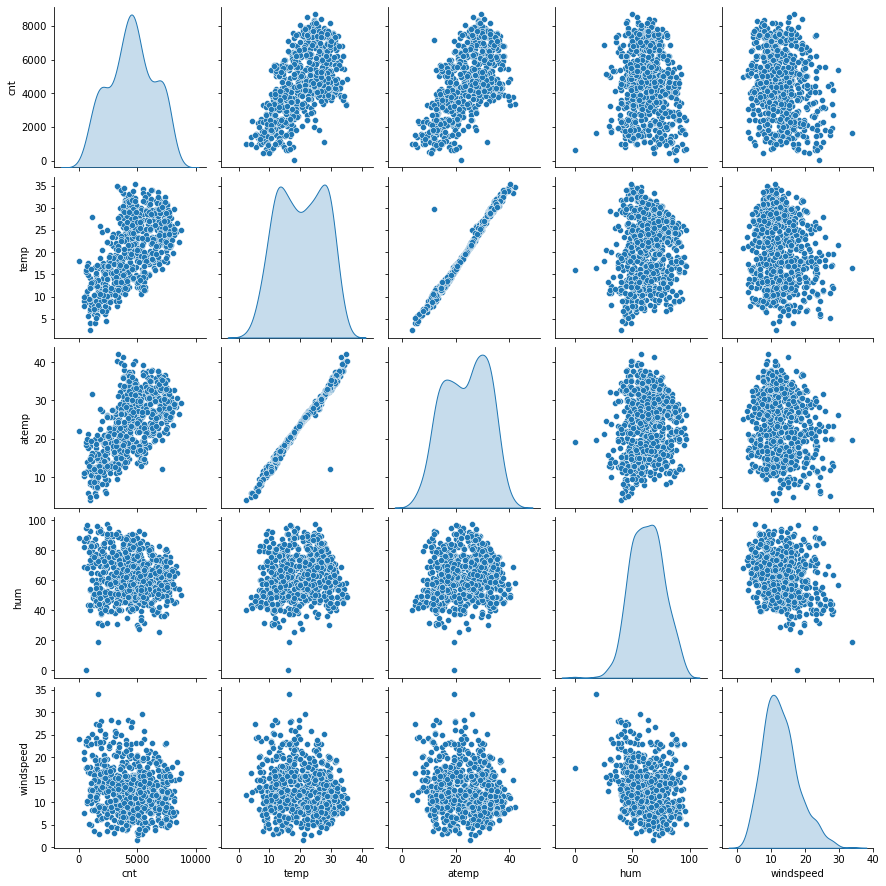

In [58]:
sns.pairplot(data=bike_share,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'], diag_kind='kde')

There exists a linear relation between 'temp' and 'atemp' with the ‘cnt’

#### The independent variables don't have multicollinearity

In [59]:
df1 = X_train[cols]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,4.80
2,season_Autumn,4.07
0,yr,2.05
5,mnth_Aug,1.85
4,season_Winter,1.60
9,weathersit_Mist & Cloudy,1.51
6,mnth_Sep,1.47
3,season_Spring,1.33
7,weekday_Tuesday,1.19
8,weathersit_Light Snow & Rain,1.06


VIF values above are within the range of 5, thus showing no multicollinearity

### MAKING PREDICTION USING FINAL MODEL

In [60]:
#scaling the test data
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
test[num_vars] = scaler.transform(test[num_vars])

In [61]:
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Autumn,season_Spring,...,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,1,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,1,0,0


In [62]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Autumn,season_Spring,...,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.246575,0.255708,...,0.132420,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.432005,0.437258,...,0.339723,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# Dividing into X and Y test sets
y_test = test.pop('cnt')
X_test = test

In [64]:
#Selecting the variables that were part of final model
cols = ['yr', 'temp', 'season_Autumn', 'season_Spring', 'season_Winter',
       'mnth_Aug', 'mnth_Sep', 'weekday_Tuesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy']

#col1 = X_train[cols]
X_test = X_test[cols]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   yr                            219 non-null    int64  
 2   temp                          219 non-null    float64
 3   season_Autumn                 219 non-null    uint8  
 4   season_Spring                 219 non-null    uint8  
 5   season_Winter                 219 non-null    uint8  
 6   mnth_Aug                      219 non-null    uint8  
 7   mnth_Sep                      219 non-null    uint8  
 8   weekday_Tuesday               219 non-null    uint8  
 9   weathersit_Light Snow & Rain  219 non-null    uint8  
 10  weathersit_Mist & Cloudy      219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 8.6 KB


In [65]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

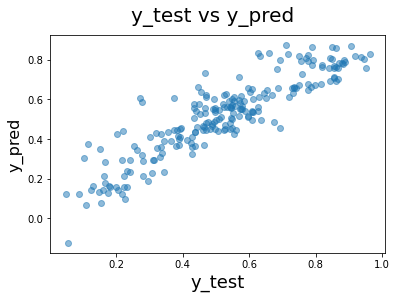

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

Checking error terms for train data

In [67]:
#r2
r2_score(y_train, y_train_pred)

0.8214485398429692

In [68]:
#Adjusted R2
0.818

0.818

Checking error terms for test data

In [69]:
r2_score(y_test, y_pred)

0.8050607733128143

In [70]:
#Adjusted R2
r2 = 0.8050607733128143

n = X_test.shape[0]

p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7956886951066997

In [71]:
mse = mean_squared_error(y_test, y_pred)
mse

0.009258796111699169

#### Train - Test Results Comparison:

Train R2 : 0.821
Train Adjusted R2 : 0.818
    
Test R2 : 0.8050607733128143
Test Adjusted R2 : 0.7956886951066997
    
Mean Squared Error of the predicted model : 0.009258796111699169
    
We can safely say that the model is a good one as it generalises the train and test datasets

### CONCLUSIONS:
The top 3 predictor variables as suggested by the final model are temp, mnth_Sep and mnth_Aug.

Temperature (temp) - Coefficient of ‘0.4944’ points out to the fact that a unit increase in temp variable increases the bookings by 0.4944 units.

September (mnth_Sep) - Coefficient of ‘0.1076’ points out to the fact that a unit increase in mnth_Sep variable increases the bookings by 0.1076 units.

August (mnth_Aug) - Coefficient of ‘0.0434’ points out to the fact that a unit increase in mnth_Aug variable increases the bookings by 0.0434 units.

The coefficient for yr (Year) is also high, meaning that there will be increase in bookings the next year.
These factors will play a very vital role in the bookings. 
Other factors like cloud and rain prove to be negatively impacting the situation. That period could be utilized for related activities like bike servicing, advertising, marketting, etc.
Therefore the management should take wise decisions to curb the problem related to bookings.